## 01_knn_class.ipynb 


In [92]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

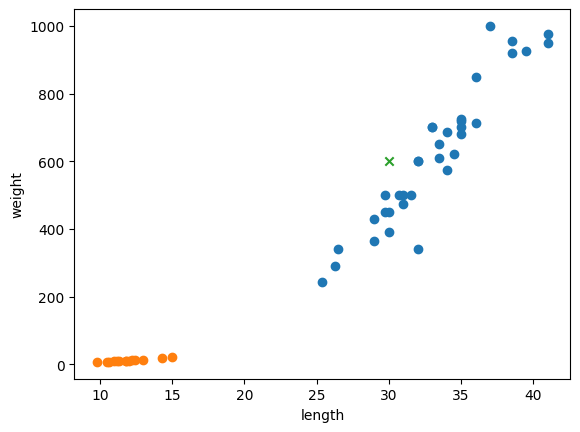

In [93]:

import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter([30], [600], marker='x')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [94]:
bream_df = pd.DataFrame({
    'l': bream_length,
    'w':bream_weight,
    'c':[1]*len(bream_length)
})
smelt_df = pd.DataFrame({
    'l': smelt_length,
    'w': smelt_weight,
    'c':[0]*len(smelt_length)
})
df = pd.concat([bream_df,smelt_df], ignore_index=True)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
# .fit() 핛습 
X= df[['l', 'w']]
y= df['c']
kn.fit(X,y) 
##KNN 이라는 분류기가 학습을 해줌. 

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [96]:
kn.score(X, y)


1.0

In [97]:
kn.predict([[30, 600],  [20, 100]]) 

/Users/gim-yujin/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0])

In [98]:
kn._fit_X #빠르게 거리를 재서 가져옴 
kn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [99]:
kn49 =KNeighborsClassifier(n_neighbors= 49)#가진 데이터 49 데이터
kn49.fit(X,y)
kn49.score(X,y) #데이터에 도미가 더 많음 -> 뭐가 됐든 다 도미라고 분류 


0.7142857142857143

# 지도학습(supervised learning) VS 비지도학습 (unsupervised learning)
지도학습 -> X입력(input) + y타겟 (target) -> 훈련데이터 

생선데이터
- 입력 -> 길이특성, 무게특성 
- 타깃 -> 0,1
- 입력 + 타깃 = 훈련데이터


훈련데이터, 테스트 데이터 

In [100]:
# 도미만 학습을 시킴
train_X = df[:35][['l','w']]
train_y = df[:35]['c']
# 빙어로 테스트 
test_X = df[35:][['l','w']]
test_y = df[35:]['c']


In [101]:
kn = KNeighborsClassifier()
kn.fit(train_X, train_y)
kn.score(test_X,test_y)


0.0

In [102]:
# 훈련 셋과 테스트 셋을 잘 나눠야함 
from sklearn.model_selection import train_test_split

train_X, test_X, train_y , test_y = train_test_split(X,y, random_state=42) # 여기서 random state를 지정

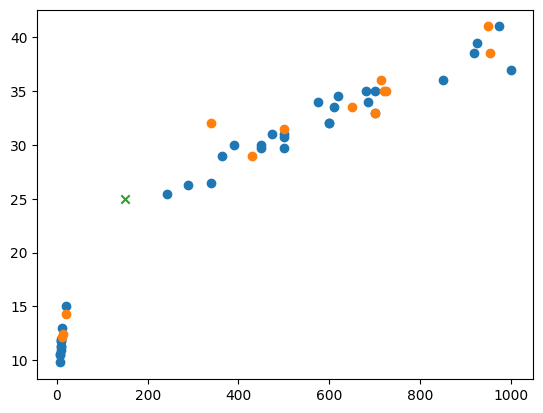

In [103]:
plt.scatter(train_X['w'], train_X['l'])
plt.scatter(test_X['w'], test_X['l'])
plt .scatter([150], [25], marker= 'x')


In [104]:
kn.fit(train_X, train_y)
kn.score(test_X, test_y)

1.0

In [105]:
kn.predict([[20, 150]])

/Users/gim-yujin/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [106]:
kn.predict([[25, 150]])

/Users/gim-yujin/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

/Users/gim-yujin/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


InvalidIndexError: (array([[ 6, 33, 28, 27, 30]]), 0)

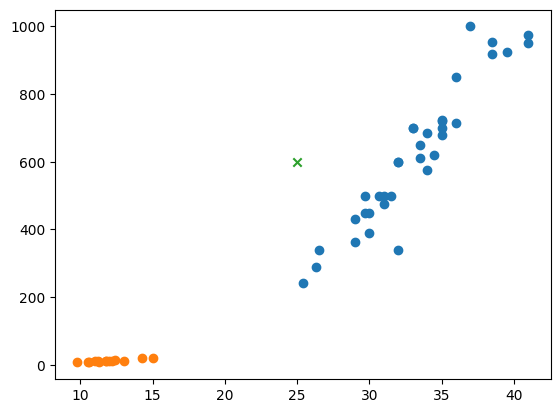

In [107]:

# 특정 점 (25,600)에 대한 최근접 이웃 찾기
distances, indexes = kn.kneighbors([[25, 600]])

# 시각화
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([25], [600], marker='x')
plt.scatter(train_X[indexes, 0], train_X[indexes, 1], marker='D')  # 이웃 점 표시
plt.show()

In [ ]:
import numpy as np
mean= np.mean(train_X, axis=0)
std =np. std(train_X, axis = 0 )
scaled_X = (train_X- mean)/std 



In [ ]:
plt.scatter(scaled_X[:]['l']), sclaed 

In [ ]:
kn.fit(scaled_X, train_y) #스케일링 한상태로 fit을 함 
test_scaled_X = (test_X-mean) / std
kn.score(test_scaled_X, test_y)

1.0

In [ ]:
kn.predict([new])

In [ ]:
# 머신러닝 복습 